In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# here we gonna use two independent features and one output or dependent features

In [ ]:
df=pd.read_csv("data1.csv")

In [42]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [43]:
#drop unwanted col based on interest and uployemnt rate we predict indec_price
#axis = 0 rows and axis =1 col
#Inplace using this compeletely dropping this
df.drop(columns=["Unnamed: 0","year","month"],axis=1,inplace=True)

In [44]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [45]:
#check null value
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

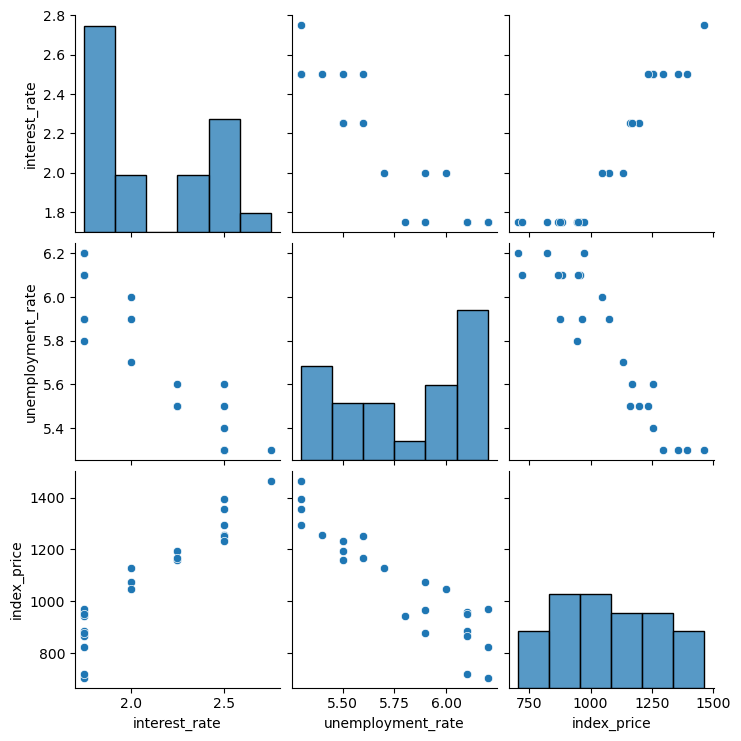

In [46]:
## lets do some visuals
import seaborn as sns
sns.pairplot(df)

In [47]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'unemployment rate')

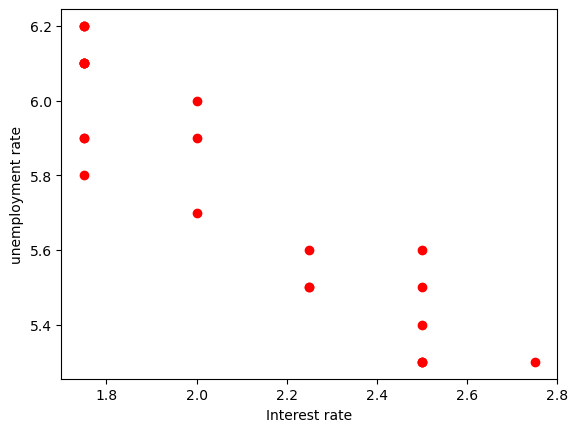

In [48]:
## visualize more datapoints
plt.scatter(df['interest_rate'],df['unemployment_rate'],color='r')
plt.xlabel("Interest rate")
plt.ylabel("unemployment rate")

In [49]:
## get the independent and dependent features
x=df[['interest_rate','unemployment_rate']]
y=df['index_price']

In [50]:
x

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4
5,2.50,5.6
6,2.50,5.5
7,2.25,5.5
8,2.25,5.5
9,2.25,5.6


In [51]:
y

0     1464
1     1394
2     1357
3     1293
4     1256
5     1254
6     1234
7     1195
8     1159
9     1167
10    1130
11    1075
12    1047
13     965
14     943
15     958
16     971
17     949
18     884
19     866
20     876
21     822
22     704
23     719
Name: index_price, dtype: int64

In [52]:
from sklearn.model_selection import train_test_split

In [58]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.25,random_state=42)

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

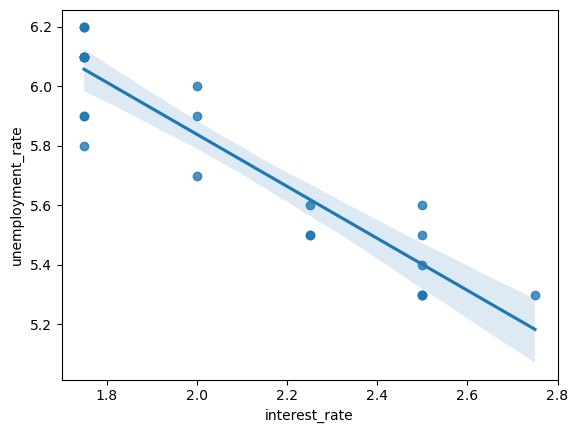

In [53]:
import seaborn as sns
sns.regplot(x='interest_rate', y='unemployment_rate', data=df)


In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
scaler=StandardScaler()

In [59]:
scaler.fit_transform(X_train)

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [60]:
scaler.transform(X_test)

array([[ 0.57346234, -0.8615569 ],
       [-0.90115511,  1.30956648],
       [ 2.0480798 , -1.48187786],
       [-0.90115511,  0.999406  ],
       [-0.16384638,  0.37908503],
       [ 0.57346234, -0.55139641]])

In [61]:
from sklearn.linear_model import LinearRegression


In [62]:
regression=LinearRegression(n_jobs=-1)

In [63]:
regression.fit(X_train,Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,-1
,positive,False


In [64]:
print(regression.coef_)
print(regression.intercept_)

[ 260.33709119 -360.58377051]
2601.67998660565


In [67]:
# for ex: 1000 rec -> train(900) and test(100 not used) then train to train and validation
from sklearn.model_selection import cross_val_score
valdiation_score=cross_val_score(regression,X_train,Y_train,scoring='neg_mean_squared_error',cv=3)

In [69]:
valdiation_score

array([-4921.61331265, -7686.87497294, -5135.9962549 ])

In [72]:
np.mean(valdiation_score)

np.float64(-5914.828180162397)

In [75]:
y_pred=regression.predict(X_test)

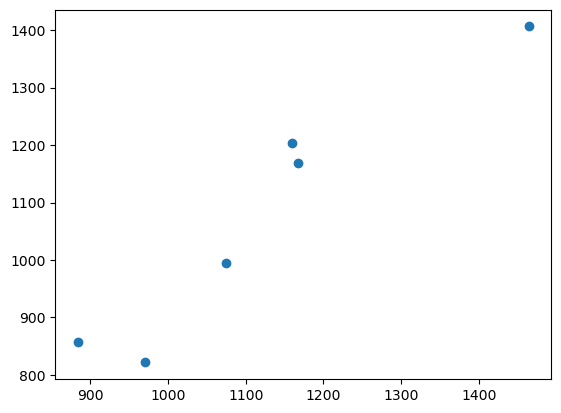

In [76]:
plt.scatter(Y_test,y_pred)

In [79]:
residuals=Y_test-y_pred
print(residuals)

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64


In [80]:
## plot tresiduals

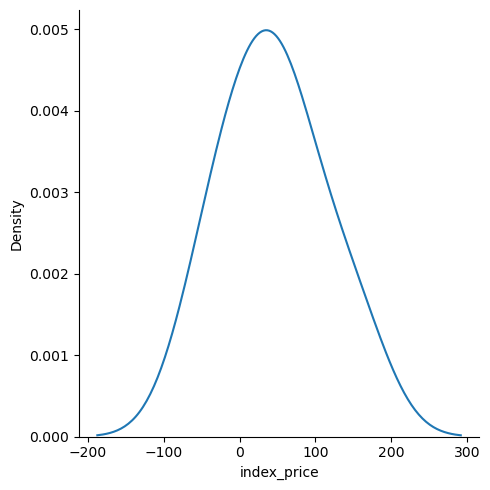

In [81]:
sns.displot(residuals,kind='kde')
# the curve like this then the model is good

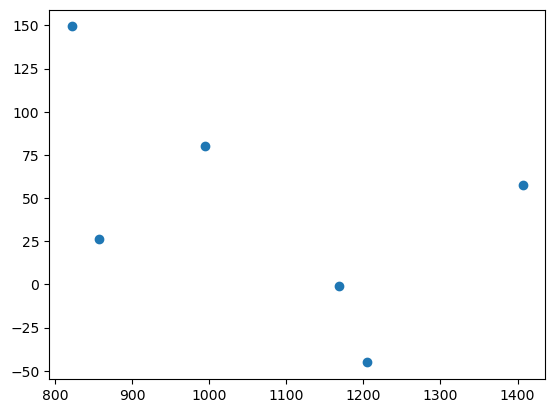

In [83]:
# create a scatter plot with respect to prdiction and residuls
plt.scatter(y_pred,residuals)

In [84]:
import statsmodels.api as sm
model=sm.OLS(Y_train,X_train).fit()
prediction=model.predict(X_test)
print(prediction)
print(model.summary())

8     1169.232446
16     869.856341
0     1458.321844
18     871.913683
11    1018.515723
9     1167.175105
dtype: float64
                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                              1468.
Date:                Mon, 26 Jan 2026   Prob (F-statistic):                    7.46e-19
Time:                        13:23:38   Log-Likelihood:                         -104.21
No. Observations:                  18   AIC:                                      212.4
Df Residuals:                      16   BIC:                                      214.2
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                

In [86]:
from sklearn.linear_model import SGDRegressor

model = SGDRegressor(max_iter=1000, learning_rate='constant', eta0=0.01)
model.fit(x,y)


,loss,'squared_error'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,random_state,None
